# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Stochastic Process
- a collection of random variables 
- the collection can be interpreted as separate time steps
    - the next step is randomly drawn from a distribution

## Brownian motion as one example for a random movement
- initial position $\Delta d = 0$
- time $\Delta t$
- a random movement $\Delta d$ is sampled from a normal distribution with mean $\mu = 0$ and the variance $\sigma^2 = \Delta t$
    - $\Delta d \sim \mathcal{N}(0, \Delta t)$
- With that the position $d(t)$ evolves as $d(t + \Delta t) = d(t) + \Delta d$

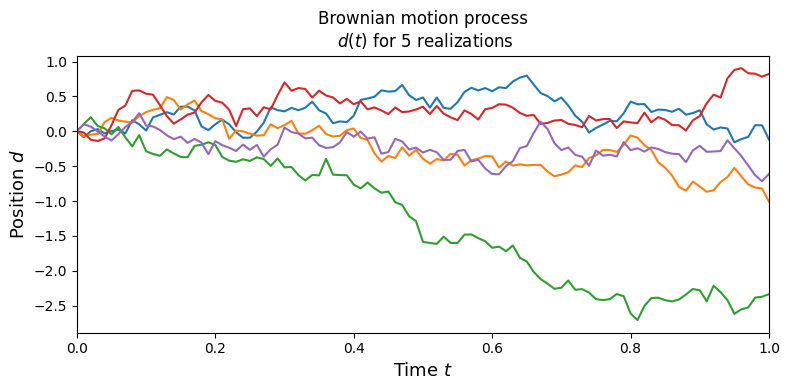

In [2]:
n_realizations = 5

delta_t = 0.01
steps = 100
mean = 0


def brownian_motion(mean, delta_t, steps):
    stdev = np.sqrt(delta_t)
    d_list = [0]
    for _ in range(steps):
        delta_d = np.random.normal(mean, stdev)
        d = d_list[-1] + delta_d
        d_list.append(d)
    return d_list


plt.figure(figsize=(8, 4))
t = np.linspace(0, steps * delta_t, steps + 1)
for _ in range(n_realizations):
    plt.plot(t, brownian_motion(mean, delta_t, steps))
plt.title(f"Brownian motion process\n $d(t)$ for {n_realizations} realizations")
plt.xlabel("Time $t$", fontsize=13)
plt.ylabel("Position $d$", fontsize=13)
plt.xlim([-0, 1])
plt.tight_layout()
plt.show()
#

## Stochastic processes as distributions over functions
- A stochastic process can be realized in several paths. 
- Each path defines a position for each time step. 
- Each realization corresponds to a function $d(t)$. 
- A stochastic process can be interpreted as a random distribution over functions. 
- Different realizations of a function can be sampled from a stochastic process. 
- Each realized function may be different due to the randomness of the stochastic process.

## Gaussian processes
- The Gaussian process is a stochastic process distributed over the functions $f(x), f \in \mathcal{H}$. 
- With $x_1, ..., x_n$ as a finite number of points in $\mathcal{X}$, 
    - at any location $x$, $f(x)$ is a random variable
    - the probability density of $\boldsymbol{f} = \{f(x_1), ..., f(x_n)\}^{\top}, f \in \mathcal{H}$  is a multivariate normal $f \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$. 
    - The multivariate normal is defined by the 
        - mean functions $\boldsymbol{\mu} = \{\mu(x_1), ..., \mu(x_n)\},\quad \mu(x) = \mathbb{E}[f(x)]$ and 
        - covariance matrix $\boldsymbol{\Sigma_{ij}} = K(x_i, x_j), \quad K(x_i, x_j) = \mathbb{E}[(f(x_i)-\mathbb{E}[x_i])(f(x_j)-\mathbb{E}[x_j])]=\mathbb{E}[(f(x_i)-\mu(x_i))(f(x_j)-\mu(x_j))]$
        - at different locations xᵢ and xⱼ, the random variables f(xᵢ) and f(xⱼ) are correlated
        - $(x_i,x_j)$ represents all possible pairs from the input domain
        - the correlation strength between f(xᵢ) and f(xⱼ) depends on the distance between xᵢ and xⱼ. In general, as xⱼ moves away from xᵢ, their correlation strength decays.




Definition: A stochastic process over domain $\mathcal{X}$ with mean function $\mu$ and covariance kernel $K$ is a Gaussian process if and only if for any $\left\{x_1, \ldots, x_n\right\} \in \mathcal{X}$ and $n \in \mathbb{N}$ the distribution of $\mathbf{f}=\left\{f\left(x_1\right), \ldots ., f\left(x_n\right)\right\}^T$ is
$$
\mathbf{f}=\left(\begin{array}{c}
f\left(x_1\right) \\
\vdots \\
f\left(x_n\right)
\end{array}\right) \sim \mathcal{N}\left(\left[\begin{array}{c}
\mu\left(x_1\right) \\
\vdots \\
\mu\left(x_n\right)
\end{array}\right],\left[\begin{array}{ccc}
K\left(x_1, x_1\right) & \cdots & K\left(x_1, x_n\right) \\
\vdots & \ddots & \vdots \\
K\left(x_1, x_n\right) & \cdots & K\left(x_n, x_n\right)
\end{array}\right]\right) .
$$

## Kernel function
The kernel function models the covariance between each pair of $x_i$ and $x_j$. Together with the mean the covariance is chosen to form a prior on the distribution. 

The most popular kernel function is the radial basis function (RBF) kernel. 
$$k(x_i, x_j) = \exp{ \left( -\frac{1}{2\sigma^2} \lVert x_i - x_j \rVert^2 \right)}$$

In [3]:
class rbf_kernel:
    def __init__(self, sigma: float = 1) -> float:
        """The ``__init__()`` method acts as a constructor for the ``rbf_kernel`` class."""
        self.sigma = sigma

    def get_K(self, x_i: float, x_j: float) -> float:
        """Calculate the weighted distance of x_i and x_j"""
        k_ij = np.exp(-1.0 * (x_i - x_j) ** 2 / self.sigma**2)
        return k_ij

In [4]:
# get the covariance matrix be calculating every entry
def get_covMat(X_a, X_b, kernel):
    covMat = np.zeros((len(X_a), len(X_b)))

    for i in range(0, len(X_a)):
        for j in range(0, len(X_b)):
            covMat[i, j] = kernel.get_K(X_a[i], X_b[j])
    return covMat

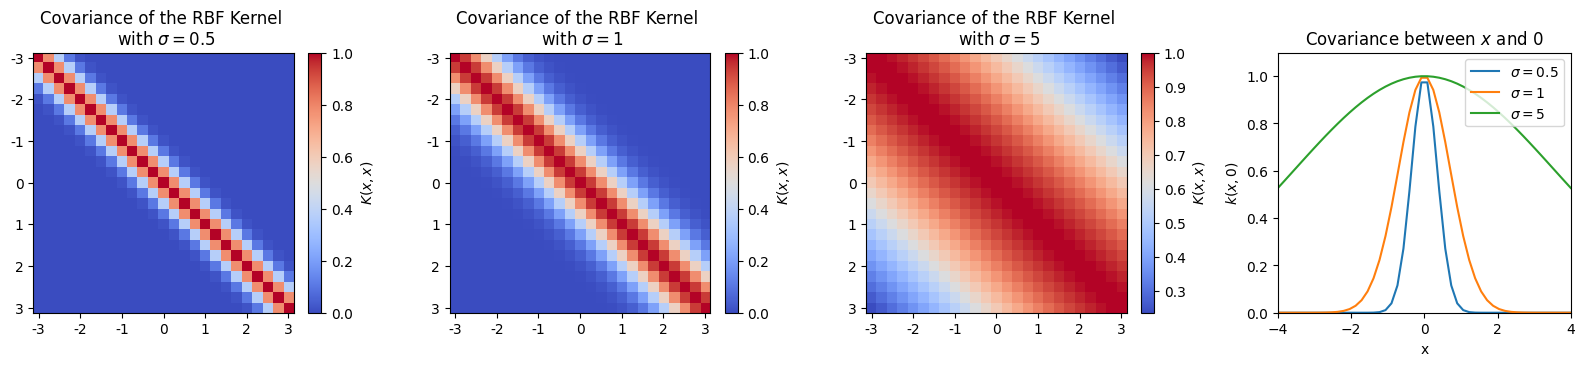

In [5]:
# visualize the influence of sigma on the covariance matrix
sigma_lst = [0.5, 1, 5]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 3.6))

for i, ax in enumerate([ax1, ax2, ax3]):
    xlim = (-3, 3)
    X = np.linspace(*xlim, 25)
    covMat = get_covMat(X, X, rbf_kernel(sigma_lst[i]))

    im = ax.imshow(covMat, cmap=cm.coolwarm)
    cbar = plt.colorbar(im, ax=ax, fraction=0.045, pad=0.05)
    cbar.ax.set_ylabel("$K(x,x)$")
    ax.set_title(f"Covariance of the RBF Kernel \n with $\sigma = {sigma_lst[i]}$")
    ticks = list(range(xlim[0], xlim[1] + 1))
    ax.set_xticks(np.linspace(0, len(X) - 1, len(ticks)))
    ax.set_yticks(np.linspace(0, len(X) - 1, len(ticks)))
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks)
    ax.grid(False)

    # Show covariance with X=0
    xlim = (-4, 4)
    X = np.expand_dims(np.linspace(*xlim, num=50), 1)
    zero = np.array([[0]])
    covMat0 = get_covMat(X, zero, rbf_kernel(sigma_lst[i]))
    # Make the plots
    ax4.plot(X[:, 0], covMat0[:, 0], label=f"$\sigma = {sigma_lst[i]}$")
ax4.set_xlabel("x")
ax4.set_ylabel("$k(x,0)$")
ax4.set_title("Covariance between $x$ and $0$")
ax4.set_ylim([0, 1.1])
ax4.set_xlim(*xlim)
ax4.legend(loc=1)

fig.tight_layout()
plt.show()

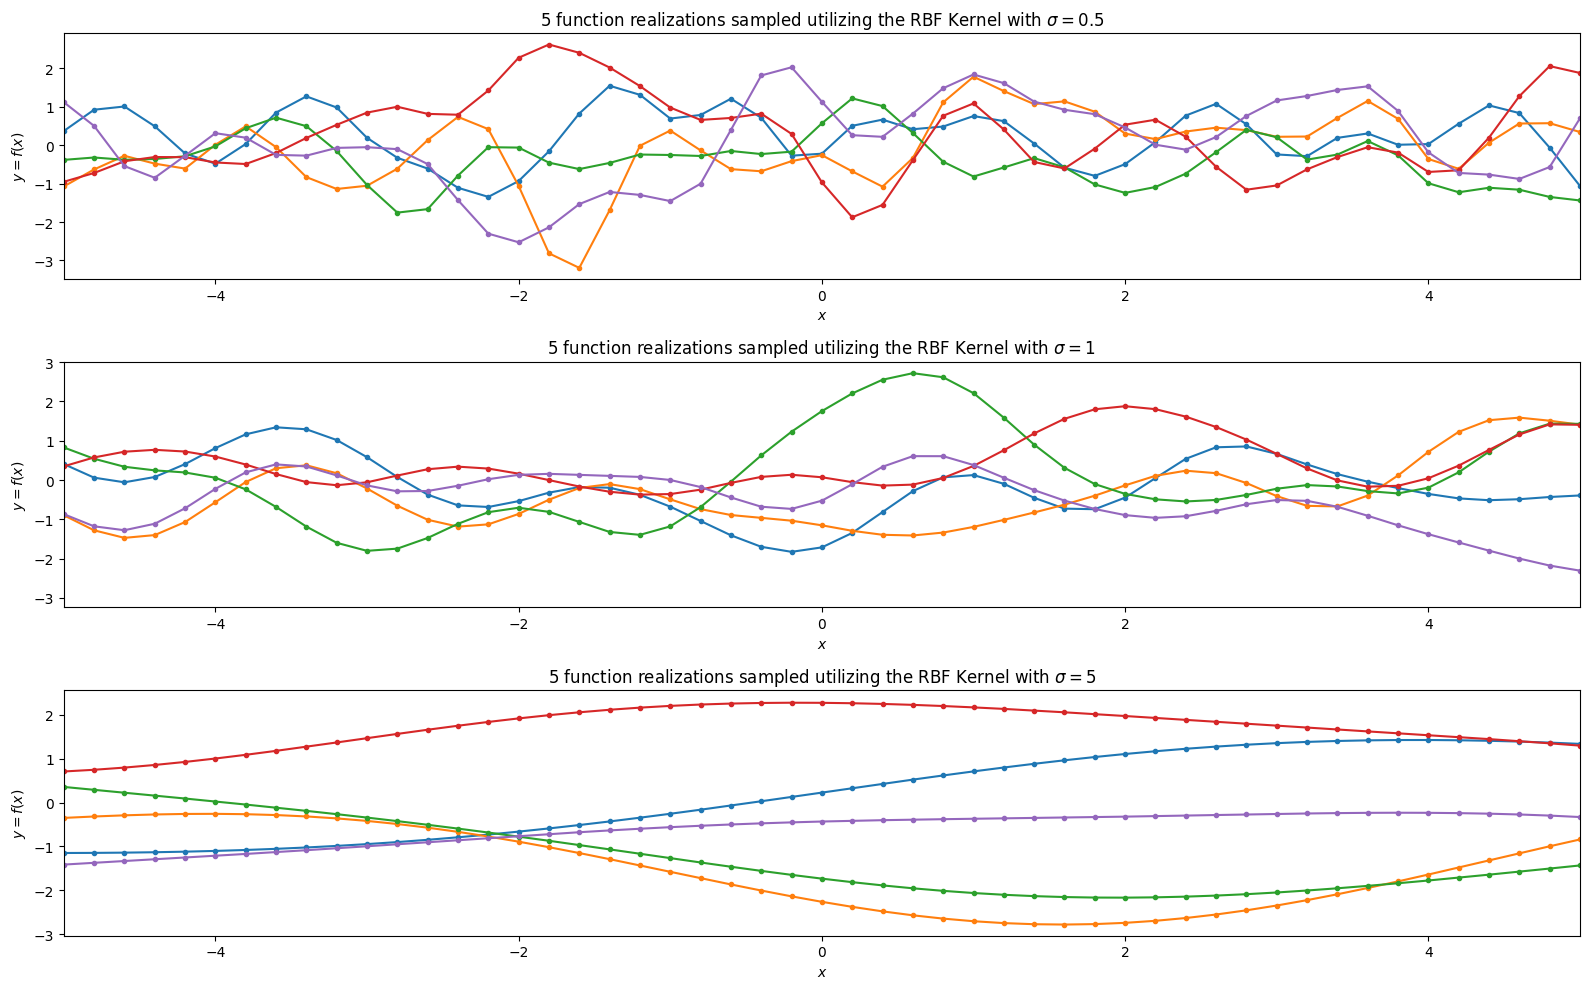

In [6]:
n_samples = 151
n_functions = 5

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 10))
for i, ax in enumerate([ax1, ax2, ax3]):
    X = np.linspace(-15, 15, n_samples)
    covMat = get_covMat(X, X, rbf_kernel(sigma_lst[i]))
    y = np.random.multivariate_normal(mean=np.zeros(n_samples), cov=covMat)
    for _ in range(n_functions):
        ax.plot(
            X,
            np.random.multivariate_normal(mean=np.zeros(n_samples), cov=covMat),
            linestyle="-",
            marker="o",
            markersize=3,
        )

    ax.set_xlabel("$x$")
    ax.set_ylabel("$y = f(x)$")
    ax.set_title(
        f"{n_functions} function realizations sampled utilizing the RBF Kernel with $\sigma = {sigma_lst[i]}$"
    )
    ax.set_xlim([-5, 5])

fig.tight_layout()
plt.show()

## Predictions from posterior
- When the $D=\{ (x_i,y_i) \}^{n}_{i=1}$ is drawn from the model $Y_i = f(x_i)+\varepsilon_i, \quad \varepsilon_i \stackrel{idd}{\sim}  \mathcal{N}(0,\sigma^2)$ (the observed data), a prior can be placed on the function space of utilizing a Gaussian Process $f \sim \mathcal{G}P(\mu(\cdot), K(\cdot))$.
- Predictions for a test set $T=\{ x_{i}^{*} \}^{m}_{i=1}$ with the corresponding $y_{i}^{*}$ can be made based on the Gaussian process prior and $n$ previously observed data points $(x,y)$
- Notation: 
$\begin{aligned}
& \mathbf{X}=\left[\begin{array}{c}
-x_1- \\
\vdots \\
-x_n-
\end{array}\right], \mathbf{X}^*=\left[\begin{array}{c}
-x_1^*- \\
\vdots \\
-x_m^*-
\end{array}\right], \quad \mathbf{Y}=\left[\begin{array}{c}
y_1 \\
\vdots \\
y_n
\end{array}\right], \quad \mathbf{Y}^*=\left[\begin{array}{c}
y_1^* \\
\vdots \\
y_m^*
\end{array}\right], \\
& \boldsymbol{\varepsilon}=\left[\begin{array}{c}
\varepsilon_1 \\
\vdots \\
\varepsilon_n
\end{array}\right], \quad \boldsymbol{\varepsilon}^*=\left[\begin{array}{c}
\varepsilon_1^* \\
\vdots \\
\varepsilon_m^*
\end{array}\right], \quad \mathbf{f}=\left[\begin{array}{c}
f\left(x_1\right) \\
\vdots \\
f\left(x_n\right)
\end{array}\right], \quad \mathbf{f}^*=\left[\begin{array}{c}
f\left(x_1^*\right) \\
\vdots \\
f\left(x_m^*\right)
\end{array}\right] .
\end{aligned}$
- Objective: get predictive distribution of $\mathbf{Y^*}$
    - as a combination of multivariate normals -> $\mathbf{Y^*}$ is a multivariate normal
    - $\mathbf{Y}^{*} \vert  \mathbf{X}^{*}, \mathbf{X}, \mathbf{Y} \sim \mathcal{N}(\boldsymbol{\mu}^{*}, \boldsymbol{\Sigma}^{*})$

- $\left[\begin{array}{c} \mathbf{Y} \\ \mathbf{Y}^{*} \end{array}\right] \vert \mathbf{X}^*, \mathbf{X} = \left[\begin{array}{c} \mathbf{f} \\ \mathbf{f}^{*} \end{array}\right] + \left[\begin{array}{c} \varepsilon \\ \varepsilon^{*} \end{array}\right]
\sim
\mathcal{N} \left(
0,
\left[ \begin{array}{cc}
\boldsymbol{\Sigma}(\mathbf{X}, \mathbf{X}) + \sigma^{2} \mathbf{I} & \boldsymbol{\Sigma}(\mathbf{X}, \mathbf{X}^{*}) \\
\boldsymbol{\Sigma}(\mathbf{X}^{*}, \mathbf{X}) & \boldsymbol{\Sigma}(\mathbf{X}^{*}, \mathbf{X}^{*}+ \sigma^{2} \mathbf{I})
\end{array} \right]
\right)$
    - $\boldsymbol{\Sigma}(\mathbf{X}, \mathbf{X}) \in \mathbb{R}^{n\times n}$ 
        - with $\boldsymbol{\Sigma}_{ij} = K(x_i, x_j)$
    - $\boldsymbol{\Sigma}^{*}(\mathbf{X}^{*}, \mathbf{X}^{*}) \in \mathbb{R}^{m\times m}$         
        - with $\boldsymbol{\Sigma}_{ij}^{*} = K(x_i^{*}, x_j^{*})$
- To get the posterior predictive density of $\mathbf{Y}^{*} \vert  \mathbf{X}^{*}, \mathbf{X}, \mathbf{Y}$ only the mean $\boldsymbol{\mu}^{*}$  and covariance $\boldsymbol{\Sigma}^{*}$ are required as $\mathbf{Y}^{*}$ is multivariate normally distributed.
    - $\boldsymbol{\mu}^{*} = \boldsymbol{\Sigma}(\mathbf{X}^{*},\mathbf{X})(\boldsymbol{\Sigma}(\mathbf{X},\mathbf{X})+ \sigma^{2} \mathbf{I})^{-1}\mathbf{Y}$
    - $\boldsymbol{\Sigma}^{*} = \boldsymbol{\Sigma}(\mathbf{X}^{*},\mathbf{X}^{*})+ \sigma^{2} \mathbf{I}-\boldsymbol{\Sigma}(\mathbf{X}^{*},\mathbf{X})(\boldsymbol{\Sigma}(\mathbf{X},\mathbf{X})+ \sigma^{2} \mathbf{I})^{-1}\boldsymbol{\Sigma}(\mathbf{X},\mathbf{X}^{*})$


In [7]:
# Gaussian process posterior
def GP(X1, y1, X2, kernel):
    # calc covariance matrices
    covMat_11 = get_covMat(X1, X1, kernel)
    covMat_21 = get_covMat(X2, X1, kernel)
    covMat_12 = covMat_21.T
    covMat_22 = get_covMat(X2, X2, kernel)

    # calc posterior mean
    m_2 = covMat_21 @ np.linalg.inv(covMat_11) @ y1
    # calc the posterior covariance
    covMat_2 = covMat_22 - covMat_21 @ np.linalg.inv(covMat_11) @ covMat_12

    return m_2, covMat_2

In [8]:
# true function to sample from
func = lambda x: (np.sin(x)).flatten()

n1 = 10  # training points
n2 = 100  # test points

domain = (-6, 6)

# generate training data
X1 = np.random.uniform(domain[0] + 2, domain[1] - 2, size=(n1, 1))
y1 = func(X1)
# predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
# calc posterior mean and covariance
m_2, covMat_2 = GP(X1, y1, X2, rbf_kernel(sigma=1))
# calc the standard deviation at the test points to be plotted
st_dev = np.sqrt(np.diag(covMat_2))

n_realizations = 125  # number of realizations in the background
# get data for n_realizations realizations
y_realizations = np.random.multivariate_normal(
    mean=m_2, cov=covMat_2, size=n_realizations
)

/tmp/ipykernel_11092/3632704211.py:17: RuntimeWarning: invalid value encountered in sqrt
  st_dev = np.sqrt(np.diag(covMat_2))


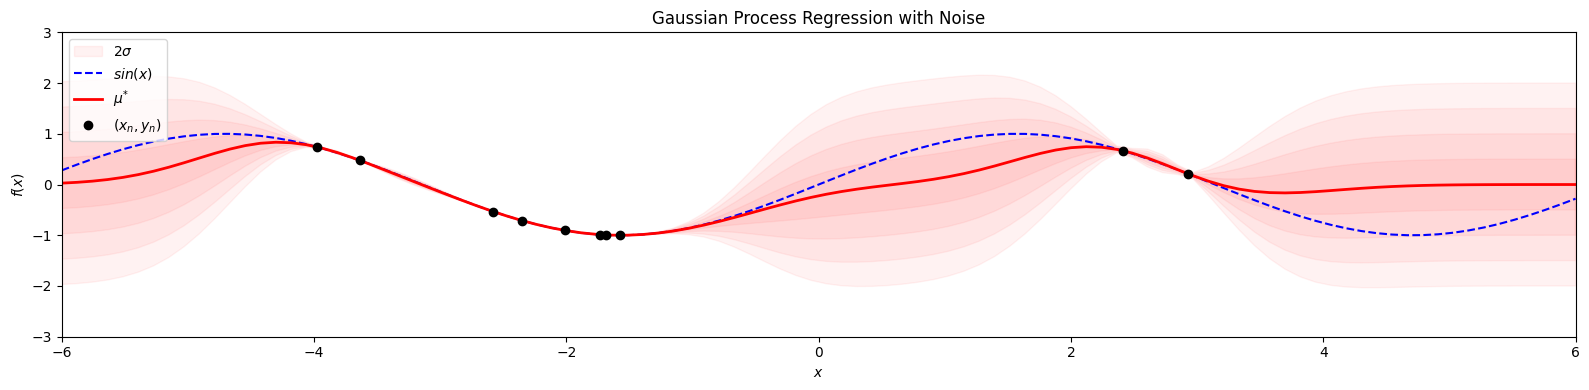

In [9]:
# plot the posterior distribution with a 2 stdev confidence interval and realizations in the background
(
    fig,
    ax1,
) = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))

# realizations in the background
ax1.fill_between(
    X2.flat,
    m_2 - 0 * st_dev,
    m_2 + 0 * st_dev,
    color="red",
    alpha=0.05,
    label="$2 \sigma$",
)
for i in range(1, 5):
    ax1.fill_between(
        X2.flat, m_2 - 0.5 * i * st_dev, m_2 + 0.5 * i * st_dev, color="red", alpha=0.05
    )
# original function
ax1.plot(X2, func(X2), "b--", label="$sin(x)$")

# confidence interval of 2 stdev

ax1.plot(X2, m_2, "r-", lw=2, label="$\mu^{*}$")
ax1.plot(X1, y1, "ko", linewidth=2, label="$(x_n, y_n)$")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.set_title("Gaussian Process Regression with Noise")
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend(loc=2)
plt.tight_layout()
plt.show()

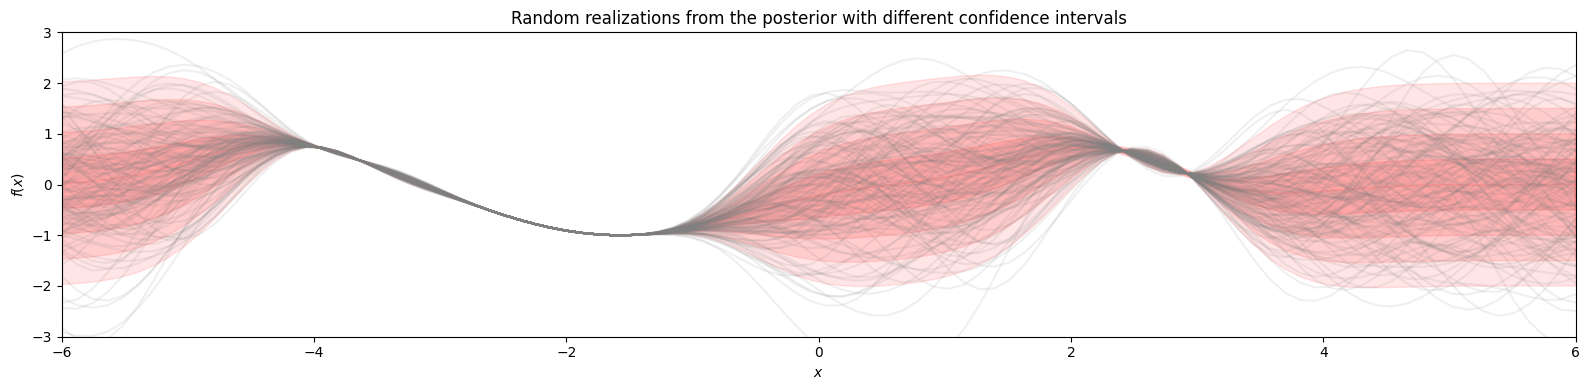

In [10]:
# realizations of the Gaussian process so showcase the confidence interval
(
    fig,
    ax1,
) = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
for i in range(5):
    ax1.fill_between(
        X2.flat,
        m_2 - 0.5 * i * st_dev,
        m_2 + 0.5 * i * st_dev,
        color="red",
        alpha=0.1,
        label="$2 \sigma$",
    )
ax1.plot(X2, y_realizations.T, "-", color="gray", alpha=0.12)
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.set_title(
    "Random realizations from the posterior with different confidence intervals"
)
ax1.axis([domain[0], domain[1], -3, 3])
ax1.set_xlim([-6, 6])
plt.tight_layout()
plt.show()

## Gaussian Process with noise

In [11]:
# Gaussian process posterior
def GP_noise(X1, y1, X2, kernel, sigma_noise):
    # calc covariance matrices
    covMat_11 = get_covMat(X1, X1, kernel)
    covMat_21 = get_covMat(X2, X1, kernel)
    covMat_12 = covMat_21.T
    covMat_22 = get_covMat(X2, X2, kernel)

    # calc posterior mean
    m_2 = (
        covMat_21
        @ np.linalg.inv(covMat_11 + np.eye(len(covMat_11)) * sigma_noise**2)
        @ y1
    )
    # calc the posterior covariance
    covMat_2 = (
        covMat_22
        + np.eye(len(covMat_22)) * sigma_noise**2
        - covMat_21 @ np.linalg.inv(covMat_11) @ covMat_12
    )

    return m_2, covMat_2  # mean, covariance

In [12]:
# true function to sample from
func = lambda x: (np.sin(x)).flatten()

n1 = 12  # training points
n2 = 100  # test points

domain = (-6, 6)

# generate training data
X1 = np.random.uniform(domain[0] + 2, domain[1] - 2, size=(n1, 1))
y1 = func(X1)
# predict points at uniform spacing to capture function
X2 = np.linspace(domain[0], domain[1], n2).reshape(-1, 1)
# calc posterior mean and covariance
m_2, covMat_2 = GP_noise(X1, y1, X2, rbf_kernel(sigma=1), 0.1)
# calc the standard deviation at the test points to be plotted
st_dev = np.sqrt(np.diag(covMat_2))

n_realizations = 75  # number of realizations in the background
# get data for n_realizations realizations
y_realizations = np.random.multivariate_normal(
    mean=m_2, cov=covMat_2, size=n_realizations
)

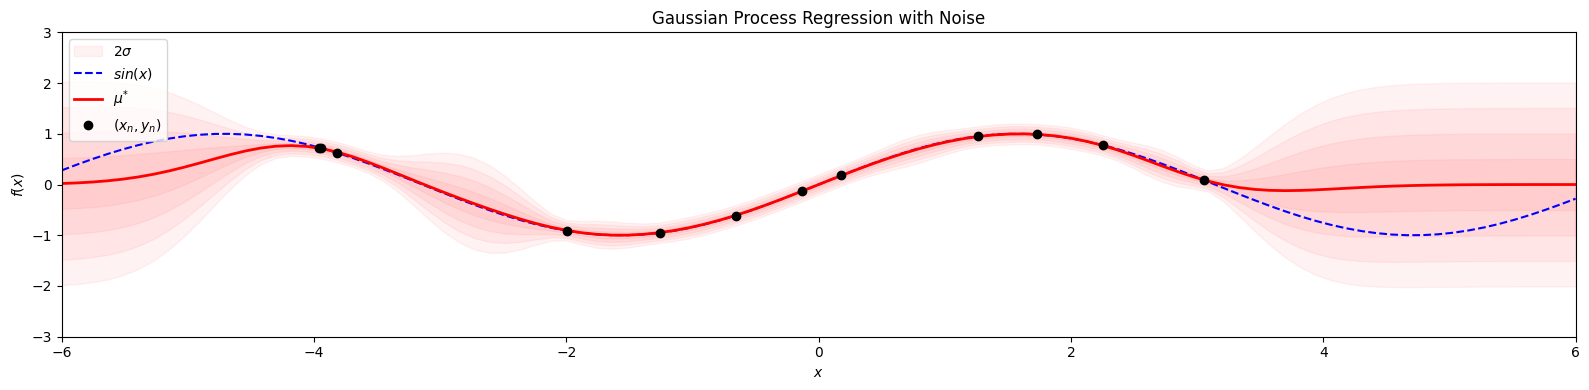

In [13]:
# plot the posterior distribution with a 2 stdev confidence interval and realizations in the background
(
    fig,
    ax1,
) = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))

# realizations in the background
# ax1.plot(X2, y_realizations.T, alpha=0.1, color='gray')

ax1.fill_between(
    X2.flat,
    m_2 - 0 * st_dev,
    m_2 + 0 * st_dev,
    color="red",
    alpha=0.05,
    label="$2 \sigma$",
)
for i in range(1, 5):
    ax1.fill_between(
        X2.flat, m_2 - 0.5 * i * st_dev, m_2 + 0.5 * i * st_dev, color="red", alpha=0.05
    )
# original function
ax1.plot(X2, func(X2), "b--", label="$sin(x)$")

# confidence interval of 2 stdev

ax1.plot(X2, m_2, "r-", lw=2, label="$\mu^{*}$")
ax1.plot(X1, y1, "ko", linewidth=2, label="$(x_n, y_n)$")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.set_title("Gaussian Process Regression with Noise")
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend(loc=2)
plt.tight_layout()
plt.show()

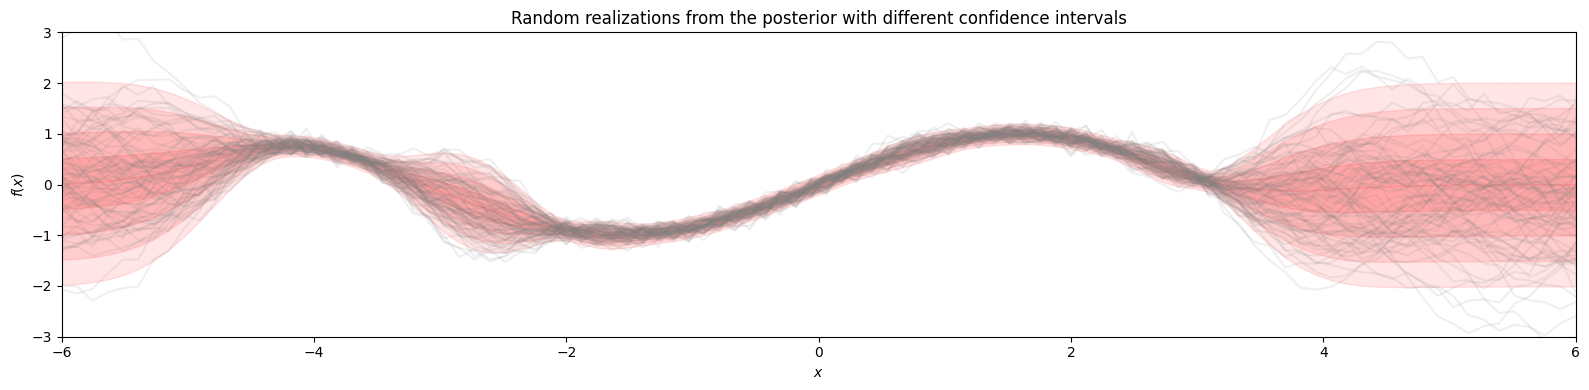

In [14]:
# realizations of the Gaussian process so showcase the confidence interval
(
    fig,
    ax1,
) = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
for i in range(5):
    ax1.fill_between(
        X2.flat,
        m_2 - 0.5 * i * st_dev,
        m_2 + 0.5 * i * st_dev,
        color="red",
        alpha=0.1,
        label="$2 \sigma$",
    )
ax1.plot(X2, y_realizations.T, "-", color="gray", alpha=0.12)
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
ax1.set_title(
    "Random realizations from the posterior with different confidence intervals"
)
ax1.axis([domain[0], domain[1], -3, 3])
ax1.set_xlim([-6, 6])
plt.tight_layout()
plt.show()

## 3D Visualization 

(0.0, 10.0)

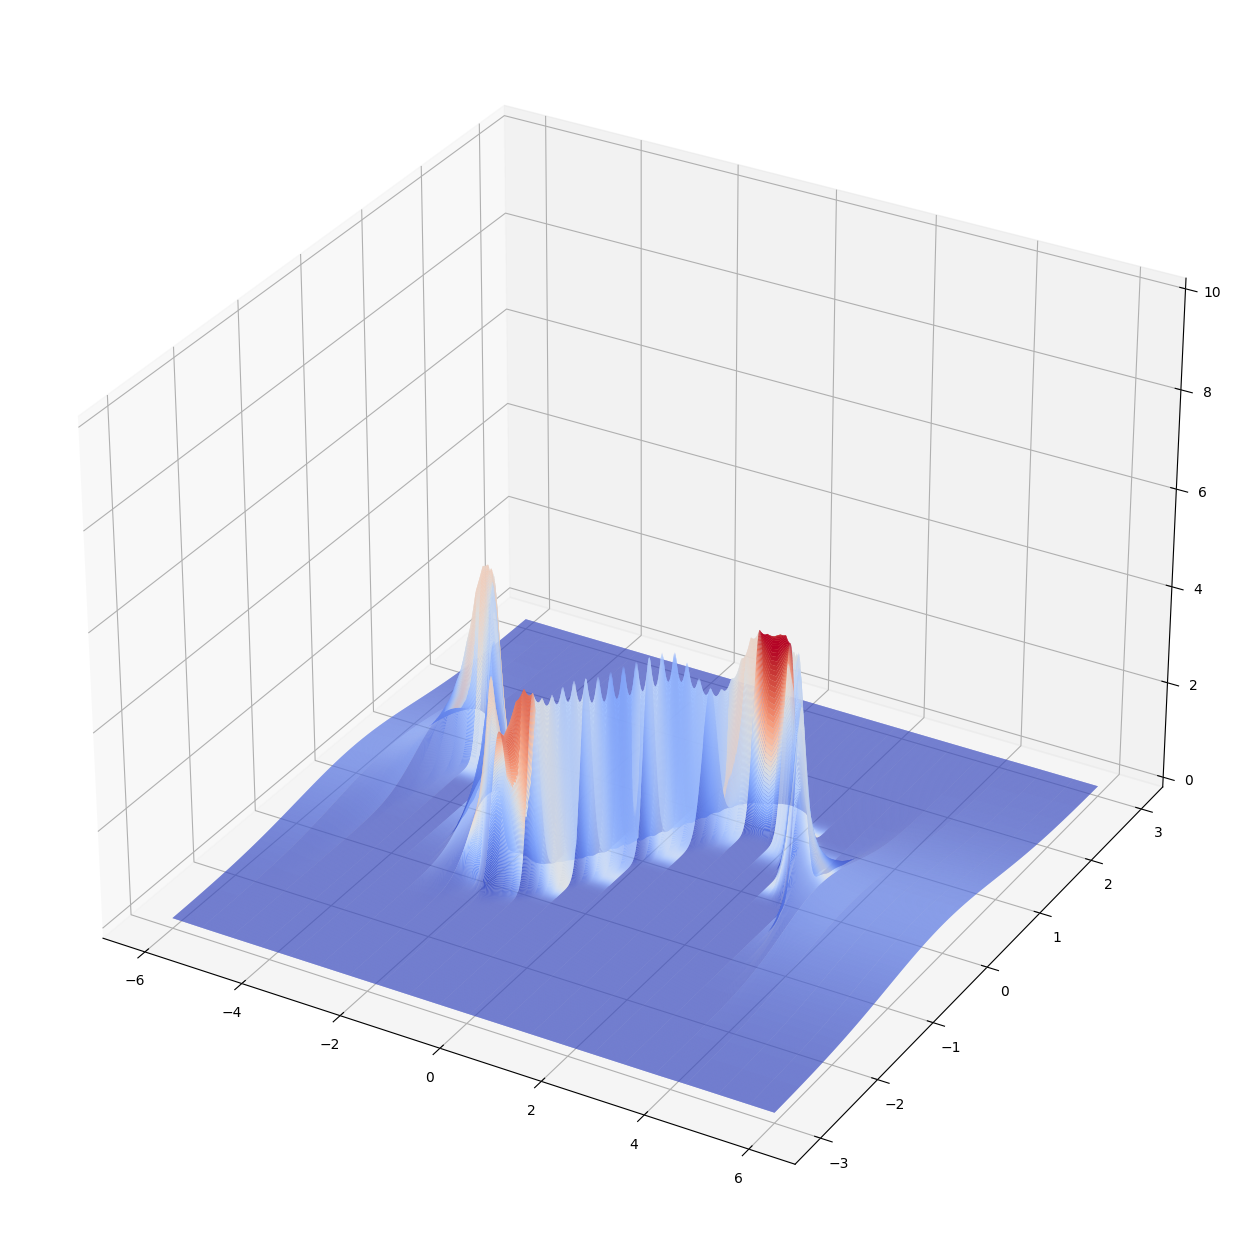

In [15]:
from scipy.stats import norm
from matplotlib import cm

x_3d = X2
y_3d = np.arange(-3, 3, 0.001)
x_3d, y_3d = np.meshgrid(x_3d, y_3d)
z_3d = norm.pdf(y_3d, m_2, st_dev)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(16, 16))
surf = ax.plot_surface(x_3d, y_3d, z_3d, cmap=cm.coolwarm, rstride=5, cstride=5)
ax.set_zlim([0, 10])

Sources:
- https://katbailey.github.io/post/gaussian-processes-for-dummies/
- https://distill.pub/2019/visual-exploration-gaussian-processes/
- https://peterroelants.github.io/posts/gaussian-process-tutorial/
- https://allofyourbases.com/2017/08/21/gaussian-processes-in-python/
- https://datascience.stackexchange.com/questions/107087/how-can-i-plot-the-covariance-matrix-of-scikit-learns-gaussian-process-kernel
- https://towardsdatascience.com/implement-a-gaussian-process-from-scratch-2a074a470bce
- http://www2.stat.duke.edu/~sayan/561/2019/lec9.pdf